In [1]:
import os # allow us to interact with the operating system
import pandas as pd

## Initial data check

In [2]:
def csv_file_records(file_path_read):
    csv_files = []  # list to store all the CSV file names
    total_rows = 0 
    
    # get a list of all CSV files in the specified directory
    for file in os.listdir(file_path_read):
        if file.endswith(".csv"):
            # join the file path with the CSV file name to create a path to the CSV
            csv_path = os.path.join(file_path_read, file)
            csv_file_df = pd.read_csv(csv_path)
            # display the number of rows contained within CSV file
            print(f'{file}: {len(csv_file_df)} rows')
            total_rows += len(csv_file_df)
    
    # display a cumulative total of the number of rows 
    print(f"\nTotal number of rows: {total_rows}")

file_path_read = 'data/raw_renamed'
csv_file_records(file_path_read) # function call to print row counts

audi.csv: 10668 rows
bmw.csv: 10781 rows
cclass.csv: 3899 rows
focus.csv: 5454 rows
ford.csv: 17965 rows
hyundai.csv: 4860 rows
mercedes-benz.csv: 13119 rows
skoda.csv: 6267 rows
toyota.csv: 6738 rows
unclean cclass.csv: 4006 rows
unclean focus.csv: 5604 rows
vauxhall.csv: 13632 rows
volkswagon.csv: 15157 rows

Total number of rows: 118150


We are going to exclude the following files:
- 'cclass.csv'
- 'focus.csv'
- 'unclean cclass.csv'
- 'unclean focus.csv'

We want to work with the brands and clean data, but the 4 files listed contain uncleaned data with additional columns and are specific models of the particular brand, as such they will be excluded.

<br>Through Excel we can verify the results and use it to determine the number of rows we should expect based on a selection of files.

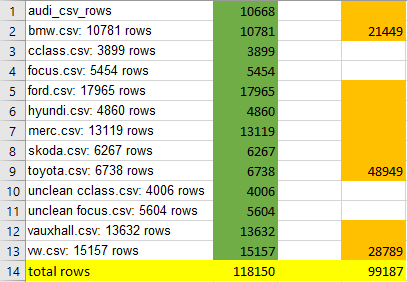

In [13]:
def read_and_process_csv(file_path_read, file_path_write, exclude_files):
    csv_files = []
    
    # define a dictionary to map the specific brands to countries (based on available data)
    brand_country_mapping = {
        'Audi': 'Germany',
        'BMW': 'Germany',
        'Ford': 'United States',
        'Hyundai': 'South Korea',
        'Mercedes-Benz': 'Germany',
        'Skoda': 'Czech Republic',
        'Toyota': 'Japan',
        'Vauxhall': 'United Kingdom',
        'Volkswagen': 'Germany'
    }
      
    for file in os.listdir(file_path_read):
        # add CSV files that end with '.csv' and do not contain any 'excluded_files' name to a list
        if file.endswith(".csv") and file not in exclude_files:
            csv_files.append(file)
    
    used_car_data = []
    
    # iterate through the previously created list of CSV files
    for csv_file in csv_files:
        csv_path = os.path.join(file_path_read, csv_file)
        csv_file_df = pd.read_csv(csv_path) # read the CSV file into a DataFrame

        # get the manufacturer name (assumes the CSV filename is the manufacturer name, hence "raw_renamed" folder, the needed initial step of renaming CSV files)
        brand_name = os.path.splitext(os.path.basename(csv_file))[0] # extract the name of the CSV file without '.csv'
        # based on the available datasets, the brands will have different representations of how the name is displayed
        if brand_name.lower() == 'mercedes-benz':
            brand_name = 'Mercedes-Benz'
        elif brand_name.lower() == 'bmw':
            brand_name = 'BMW'
        else:
            brand_name = brand_name.capitalize()
                  
        # add a column for the "country" based on brand_name as the first column
        csv_file_df.insert(0, 'country', brand_country_mapping.get(brand_name, None))
        
        # add a column for the "brand" as the second column with all other columns preceding it
        csv_file_df.insert(1, 'brand', brand_name)

        # save the modified DataFrame to a new CSV file in the 'selected' folder
        output_file_path = os.path.join(file_path_write, f"{brand_name.lower()}_modified.csv")
        csv_file_df.to_csv(output_file_path, index = False)
        
        # iterate through each row in each DataFrame and append it to the 'used_car_data' list
        for _, row in csv_file_df.iterrows():
            used_car_data.append(row.to_dict())  # convert each appended row to a dictionary
        
    return pd.DataFrame(used_car_data)

# define the path to read from (data > raw_renamed)
file_path_read = "data/raw_renamed"
# define the path to write to (data > selected)
file_path_write = "data/modified"
# define the files to be excluded
exclude_files = ['cclass.csv', 'focus.csv', 'unclean cclass.csv', 'unclean focus.csv']

# call the function to process and save each individual CSV
combined_used_car_data = read_and_process_csv(file_path_read, file_path_write, exclude_files)

# save the combine DataFrame to a CSV file without row index value
combined_used_car_data.to_csv("data/modified/combined_used_car_data.csv", index = False)

## Verify data integrity

In [109]:
file_path_read = 'data/modified'
csv_file_records(file_path_read)

audi_modified.csv: 10668 rows
bmw_modified.csv: 10781 rows
combined_used_car_data.csv: 99187 rows
ford_modified.csv: 17965 rows
hyundai_modified.csv: 4860 rows
mercedes-benz_modified.csv: 13119 rows
skoda_modified.csv: 6267 rows
toyota_modified.csv: 6738 rows
vauxhall_modified.csv: 13632 rows
volkswagen_modified.csv: 15157 rows

Total number of rows: 198374


In [111]:
audi_df = pd.read_csv('data/modified/audi_modified.csv') 
print(audi_df.info())
audi_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       10668 non-null  object 
 1   brand         10668 non-null  object 
 2   model         10668 non-null  object 
 3   year          10668 non-null  int64  
 4   price         10668 non-null  int64  
 5   transmission  10668 non-null  object 
 6   mileage       10668 non-null  int64  
 7   fuelType      10668 non-null  object 
 8   tax           10668 non-null  int64  
 9   mpg           10668 non-null  float64
 10  engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 916.9+ KB
None


,country,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Germany,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Germany,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Germany,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Germany,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Germany,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


## Exploratory data analysis

In our dataset, we can further examine each variable of each brand independently and determine its potential relevance to the price.
- country: may or may not directly influence the price, it can vary from country to country but is hard to justify.
- brand: this will not influence the price as each brand is evaluated individually.
- model: specific model can influence the price as different models have different base prices and features.
- year: crucial factor affecting the price, newer models tend to be more expensive.
- transmission: the type of transmission can influence the price, automatic transmissions are often more expensive.
- mileage: important factor as higher milege generally results in a lower price due to depreciation.
- fuelType: can influence price as some fuel types are more expensive than others.
- tax: can influence the price, especially if it varies significantly based on the year.
- mpg (miles per gallon): this is relevant as it affects the running cost of the car, in other words how fuel-efficient is it.
- engineSize: larger engine sizes may lead to higher prices as they produce more power.\

<br> The variables we will focus on are: 'year', 'price', 'transmission', 'mileage', 'fuelType' and 'engineSize'. 

In [62]:
import matplotlib.pyplot as plt

### Audi

In [113]:
audi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       10668 non-null  object 
 1   brand         10668 non-null  object 
 2   model         10668 non-null  object 
 3   year          10668 non-null  int64  
 4   price         10668 non-null  int64  
 5   transmission  10668 non-null  object 
 6   mileage       10668 non-null  int64  
 7   fuelType      10668 non-null  object 
 8   tax           10668 non-null  int64  
 9   mpg           10668 non-null  float64
 10  engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 916.9+ KB


In [112]:
print(audi_df['fuelType'].value_counts())
print(f"\n{audi_df['transmission'].value_counts()}")

fuelType
Diesel    5577
Petrol    5063
Hybrid      28
Name: count, dtype: int64

transmission
Manual       4369
Semi-Auto    3591
Automatic    2708
Name: count, dtype: int64


We need to first convert 'transmission' and 'fuelType' to numeric variables, we will define them as follows.

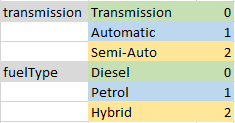

In [114]:
# create a dictionary for mapping transmission values to numeric values
transmission_mapping = {'Manual': 0, 'Automatic': 1, 'Semi-Auto': 2}

# create a new column 'transmission_numeric' using the mapping
audi_df['transmission'] = audi_df['transmission'].replace(transmission_mapping)

# # create a dictionary for mapping fuelType values to numeric values
fueltype_mapping = {'Diesel': 0, 'Petrol': 1, 'Hybrid': 2}

# # create a new column 'fuelType_numeric' using the mapping
audi_df['fuelType'] = audi_df['fuelType'].replace(fueltype_mapping)

# display the modified DataFrame
audi_df

,country,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Germany,Audi,A1,2017,12500,0,15735,1,150,55.4,1.4
1,Germany,Audi,A6,2016,16500,1,36203,0,20,64.2,2.0
2,Germany,Audi,A1,2016,11000,0,29946,1,30,55.4,1.4
3,Germany,Audi,A4,2017,16800,1,25952,0,145,67.3,2.0
4,Germany,Audi,A3,2019,17300,0,1998,1,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10663,Germany,Audi,A3,2020,16999,0,4018,1,145,49.6,1.0
10664,Germany,Audi,A3,2020,16999,0,1978,1,150,49.6,1.0
10665,Germany,Audi,A3,2020,17199,0,609,1,150,49.6,1.0
10666,Germany,Audi,Q3,2017,19499,1,8646,1,150,47.9,1.4


##### Verification

In [115]:
print(audi_df.info())
print(f"\n{audi_df['fuelType'].value_counts()}")
print(f"\n{audi_df['transmission'].value_counts()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       10668 non-null  object 
 1   brand         10668 non-null  object 
 2   model         10668 non-null  object 
 3   year          10668 non-null  int64  
 4   price         10668 non-null  int64  
 5   transmission  10668 non-null  int64  
 6   mileage       10668 non-null  int64  
 7   fuelType      10668 non-null  int64  
 8   tax           10668 non-null  int64  
 9   mpg           10668 non-null  float64
 10  engineSize    10668 non-null  float64
dtypes: float64(2), int64(6), object(3)
memory usage: 916.9+ KB
None

fuelType
0    5577
1    5063
2      28
Name: count, dtype: int64

transmission
0    4369
2    3591
1    2708
Name: count, dtype: int64


In [117]:
# note: the 'transmission' and 'fuelType' columns do not provide useful information from "describe()", but will be useful for price prediction
audi_df.describe()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,0.927072,24827.244001,0.479846,126.011436,50.770022,1.930709
std,2.167494,11714.841888,0.860760,23505.257205,0.504844,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,0.000000,1.000000,0.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,0.000000,5968.750000,0.000000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,1.000000,19000.000000,0.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,2.000000,36464.500000,1.000000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,2.000000,323000.000000,2.000000,580.000000,188.300000,6.300000


provide assumptions: e.g. assumes that mileage is a significant factor affecting price
#### option 1: normalize price per mileage - single boxplot, across entire dataset (overall; doesnt consider years)

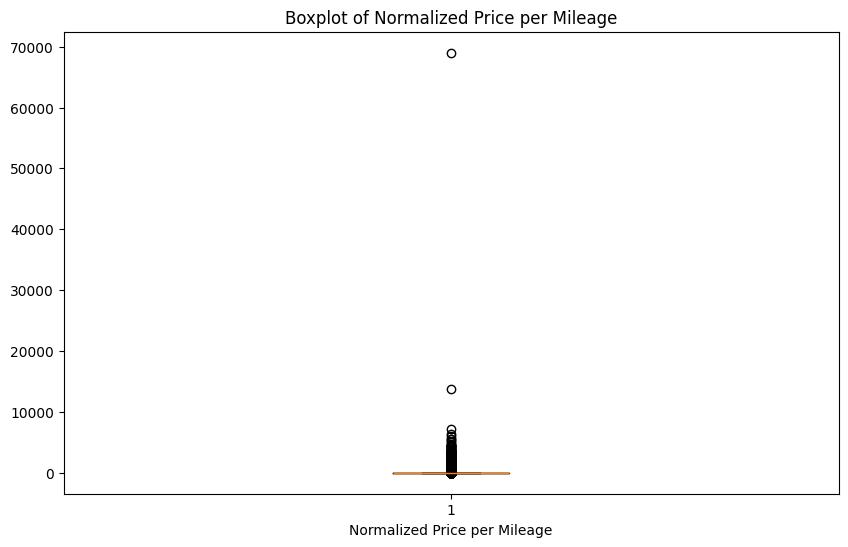

Potential outliers for normalized price per mileage:
       year  price  mileage  price_per_mileage
195    2019  29985     1881          15.940989
196    2019  27985      688          40.675872
197    2019  30985     1863          16.631777
198    2020  62985       10        6298.500000
200    2019  28985     1024          28.305664
...     ...    ...      ...                ...
10621  2019  28000     2000          14.000000
10627  2020  38000     1481          25.658339
10640  2020  37000     1436          25.766017
10641  2020  25000      751          33.288948
10665  2020  17199      609          28.241379

[1083 rows x 4 columns]


In [118]:
# Normalize price by mileage
audi_df['price_per_mileage'] = audi_df['price'] / audi_df['mileage']

# Create a boxplot for 'price_per_mileage' considering 'year'
plt.figure(figsize=(10, 6))
plt.boxplot(audi_df['price_per_mileage'])
plt.xlabel('Normalized Price per Mileage')
plt.title('Boxplot of Normalized Price per Mileage')
plt.show()

# Use IQR to identify outliers for normalized price per mileage
Q1_normalized_price = audi_df['price_per_mileage'].quantile(0.25)
Q3_normalized_price = audi_df['price_per_mileage'].quantile(0.75)
IQR_normalized_price = Q3_normalized_price - Q1_normalized_price

# Identify potential outliers for normalized price per mileage
outliers_normalized_price = audi_df[(audi_df['price_per_mileage'] < Q1_normalized_price - 1.5 * IQR_normalized_price) |
                                    (audi_df['price_per_mileage'] > Q3_normalized_price + 1.5 * IQR_normalized_price)]

print("Potential outliers for normalized price per mileage:")
print(outliers_normalized_price[['year', 'price', 'mileage', 'price_per_mileage']])


prvide assumptions: e.g. assumes that mileage is a significant factor affecting price
#### option 2: normalize price per mileage - multiple boxplot, across entire dataset (overall; consider years)

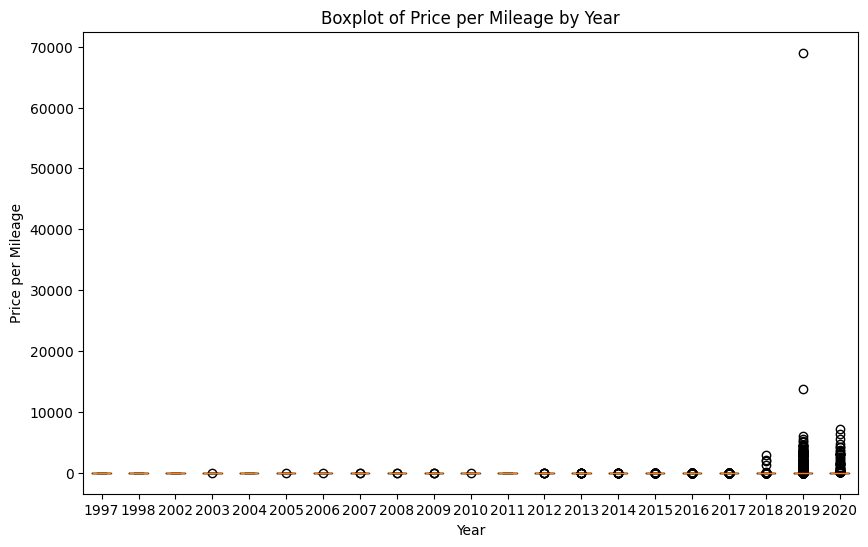

Potential outliers for normalized price per mileage:
       year  price  mileage  price_per_mileage
195    2019  29985     1881          15.940989
196    2019  27985      688          40.675872
197    2019  30985     1863          16.631777
198    2020  62985       10        6298.500000
200    2019  28985     1024          28.305664
...     ...    ...      ...                ...
10621  2019  28000     2000          14.000000
10627  2020  38000     1481          25.658339
10640  2020  37000     1436          25.766017
10641  2020  25000      751          33.288948
10665  2020  17199      609          28.241379

[1083 rows x 4 columns]


In [124]:
import matplotlib.pyplot as plt
import pandas as pd

# Normalize price by mileage
audi_df['price_per_mileage'] = audi_df['price'] / audi_df['mileage']

# Step 1: Extract unique years and sort them in ascending order
unique_years = sorted(audi_df['year'].unique())

# Step 2: Create a boxplot for 'price_per_mileage' considering 'year' in ascending order
plt.figure(figsize=(10, 6))
data_to_plot = [audi_df[audi_df['year'] == year]['price_per_mileage'] for year in unique_years]
plt.boxplot(data_to_plot, labels=[str(year) for year in unique_years])
plt.xlabel('Year')
plt.ylabel('Price per Mileage')
plt.title('Boxplot of Price per Mileage by Year')
plt.show()

# Use IQR to identify outliers for normalized price per mileage
Q1_normalized_price = audi_df['price_per_mileage'].quantile(0.25)
Q3_normalized_price = audi_df['price_per_mileage'].quantile(0.75)
IQR_normalized_price = Q3_normalized_price - Q1_normalized_price

# Identify potential outliers for normalized price per mileage
outliers_normalized_price = audi_df[(audi_df['price_per_mileage'] < Q1_normalized_price - 1.5 * IQR_normalized_price) |
                                    (audi_df['price_per_mileage'] > Q3_normalized_price + 1.5 * IQR_normalized_price)]

# Print potential outliers for normalized price per mileage
print("Potential outliers for normalized price per mileage:")
print(outliers_normalized_price[['year', 'price', 'mileage', 'price_per_mileage']])

# Also create a DataFrame for potential outliers for further analysis if needed
potential_outliers_df = outliers_normalized_price[['year', 'price', 'mileage', 'price_per_mileage']]


prvide assumptions: e.g. assumes that mileage is a significant factor affecting price
#### option 3: just display the values without consideration affect, can also display multiple variables, multiple DataFrames with multiple columns, etc.

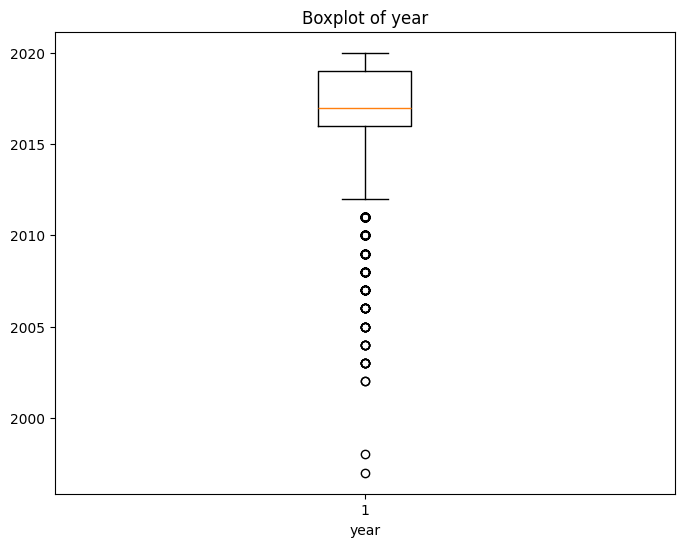

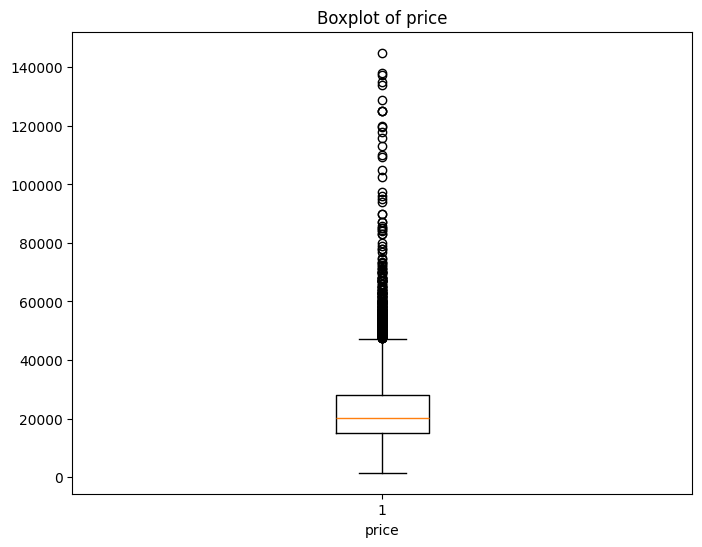

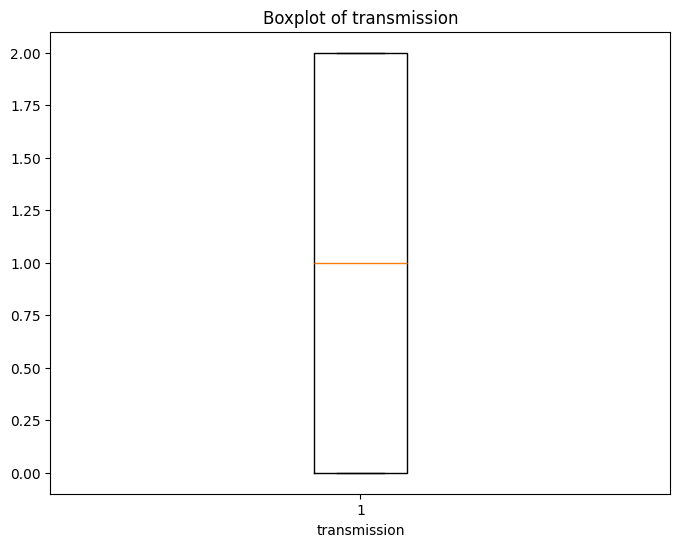

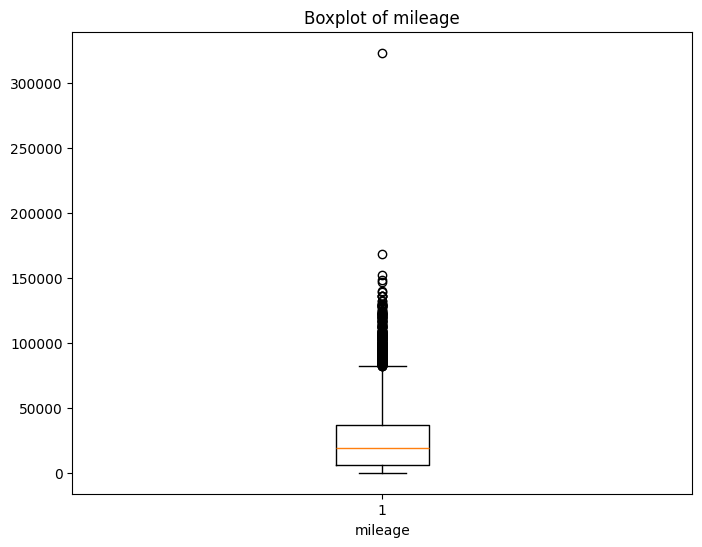

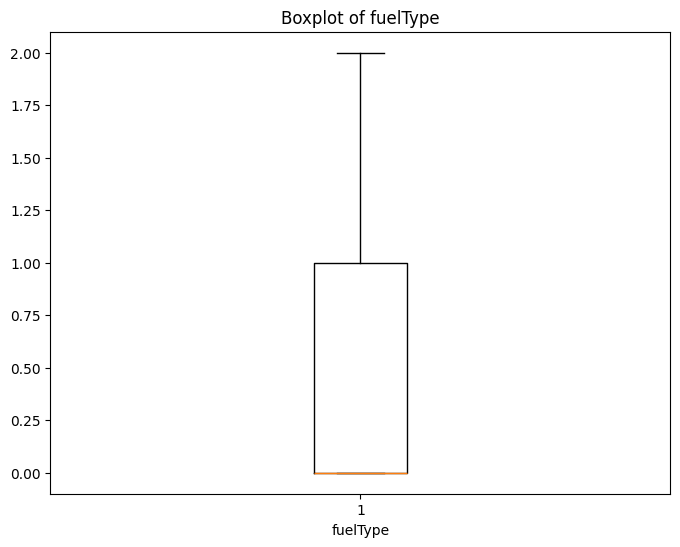

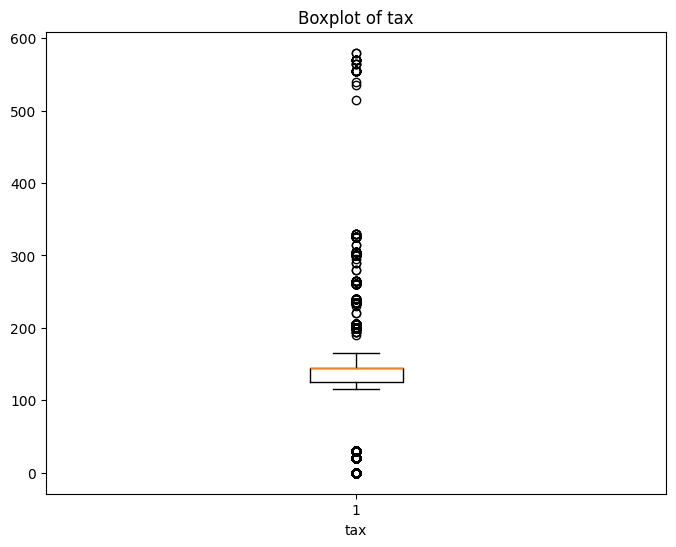

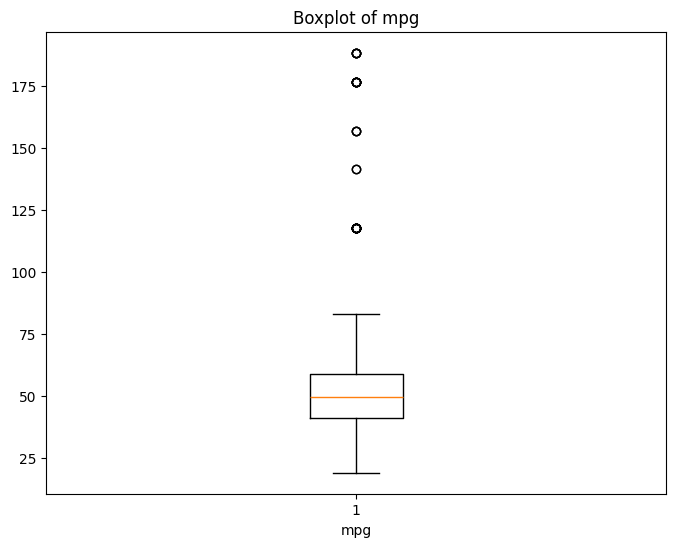

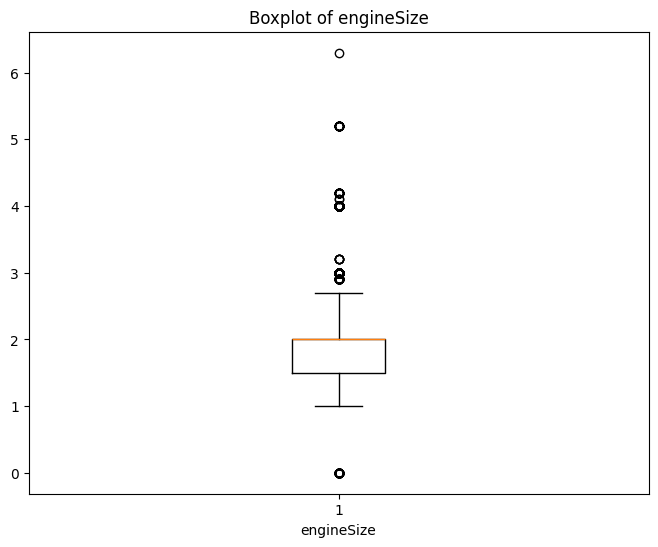

Potential outliers for price:
       year  price  mileage
198    2020  62985       10
221    2019  49985       10
222    2019  59995       10
223    2020  47895       10
247    2019  56985     1510
...     ...    ...      ...
10530  2016  52950    27000
10546  2020  49000       38
10597  2020  68000     4162
10602  2020  53792     3182
10648  2016  49990    24000

[443 rows x 3 columns]

Potential outliers for mileage:
       year  price  mileage
43     2014  13200    83872
54     2015  14700    89483
66     2016  10200    97440
73     2016   8300    88215
151    2013   8300    98940
...     ...    ...      ...
10553  2011   4395   132000
10588  2003   1490   101000
10649  2009   3750   120000
10650  2011   6995    88000
10661  2011   6995    95000

[324 rows x 3 columns]


In [92]:
# Update the relevant variables to include the important ones
relevant_variables = ['year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']

# Create a boxplot for each relevant variable
for variable in relevant_variables:
    plt.figure(figsize=(8, 6))
    plt.boxplot(audi_df[variable])
    plt.xlabel(variable)
    plt.title(f'Boxplot of {variable}')
    plt.show()

# Use IQR to identify outliers for 'price' and 'mileage'
Q1_price = audi_df['price'].quantile(0.25)
Q3_price = audi_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_mileage = audi_df['mileage'].quantile(0.25)
Q3_mileage = audi_df['mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage

# Identify potential outliers
outliers_price = audi_df[(audi_df['price'] < Q1_price - 1.5 * IQR_price) | 
                         (audi_df['price'] > Q3_price + 1.5 * IQR_price)]

outliers_mileage = audi_df[(audi_df['mileage'] < Q1_mileage - 1.5 * IQR_mileage) | 
                           (audi_df['mileage'] > Q3_mileage + 1.5 * IQR_mileage)]

print("Potential outliers for price:")
print(outliers_price[['year', 'price', 'mileage']])

print("\nPotential outliers for mileage:")
print(outliers_mileage[['year', 'price', 'mileage']])


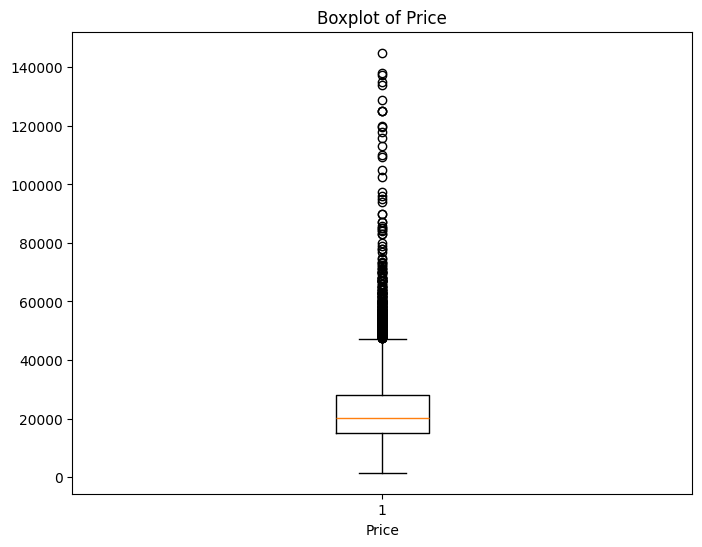

Potential outliers for price:
       year  price  mileage model
198    2020  62985       10    Q7
221    2019  49985       10    Q7
222    2019  59995       10    Q7
223    2020  47895       10    Q5
247    2019  56985     1510    Q7
...     ...    ...      ...   ...
10530  2016  52950    27000   RS6
10546  2020  49000       38    A4
10597  2020  68000     4162    Q7
10602  2020  53792     3182    Q7
10648  2016  49990    24000   RS6

[443 rows x 4 columns]


In [57]:
import matplotlib.pyplot as plt

# Create a boxplot for 'price'
plt.figure(figsize=(8, 6))
plt.boxplot(audi_df['price'])
plt.xlabel('Price')
plt.title('Boxplot of Price')
plt.show()

# Use IQR to identify outliers for 'price'
Q1_price = audi_df['price'].quantile(0.25)
Q3_price = audi_df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Identify potential outliers
outliers_price = audi_df[(audi_df['price'] < Q1_price - 1.5 * IQR_price) | 
                         (audi_df['price'] > Q3_price + 1.5 * IQR_price)]

print("Potential outliers for price:")
print(outliers_price[['year', 'price', 'mileage', 'model']])


### BMW

In [25]:
bmw_df = pd.read_csv('data/modified/bmw_modified.csv') 
bmw_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


### Ford

In [26]:
ford_df = pd.read_csv('data/modified/ford_modified.csv') 
ford_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [30]:
ford_df['year'].value_counts()

year
2017    4888
2018    4014
2019    3194
2016    2331
2015    1367
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
2060       1
Name: count, dtype: int64

### Hyundai

In [27]:
hyundai_df = pd.read_csv('data/modified/hyundai_modified.csv') 
hyundai_df.describe()

,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


### Mercedes-Benz

In [29]:
merc_df = pd.read_csv('data/modified/mercedes-benz_modified.csv') 
merc_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


### Skoda

In [125]:
skoda_df = pd.read_csv('data/modified/skoda_modified.csv') 
skoda_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,2017.502314,14275.449338,20118.452050,117.407053,56.589165,1.433509
std,1.734754,6332.051106,19955.410762,53.267949,12.037576,0.394800
min,2004.000000,995.000000,5.000000,0.000000,30.100000,0.000000
25%,2017.000000,9495.000000,5812.500000,125.000000,50.400000,1.000000
50%,2018.000000,12998.000000,14653.000000,145.000000,57.700000,1.400000
75%,2019.000000,17990.000000,28000.000000,145.000000,62.800000,2.000000
max,2020.000000,91874.000000,300000.000000,325.000000,201.800000,2.500000


In [126]:
ford_df = pd.read_csv('data/modified/ford_modified.csv') 
ford_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [94]:
import numpy as np
import statsmodels.api as sm

# Select relevant predictors
predictors = ['year', 'mileage', 'engineSize', 'tax', 'mpg']

# Add the numeric representation of 'transmission' as a predictor
predictors.append('transmission')

# Add a constant term (intercept) to the predictors
X = sm.add_constant(audi_df[predictors])

# Dependent variable
y = audi_df['price']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     6197.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:50:09   Log-Likelihood:            -1.0707e+05
No. Observations:               10668   AIC:                         2.142e+05
Df Residuals:                   10661   BIC:                         2.142e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.028e+06   8.35e+04    -48.273   

In [95]:
import pandas as pd

# Create dummy variables for 'transmission' and 'fuelType'
audi_df = pd.get_dummies(audi_df, columns=['transmission', 'fuelType'], drop_first=True)

# Select relevant predictors including the dummy variables
predictors = ['year', 'mileage', 'engineSize', 'tax', 'mpg', 
              'transmission_Semi-Auto', 'transmission_Manual',
              'fuelType_Petrol', 'fuelType_Hybrid']

# Add the numeric representation of 'transmission' as a predictor
predictors.append('transmission_numeric')

# Add a constant term (intercept) to the predictors
X = sm.add_constant(audi_df[predictors])

# Dependent variable
y = audi_df['price']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


KeyError: "['transmission_Semi-Auto', 'transmission_Manual', 'fuelType_Petrol', 'fuelType_Hybrid', 'transmission_numeric'] not in index"

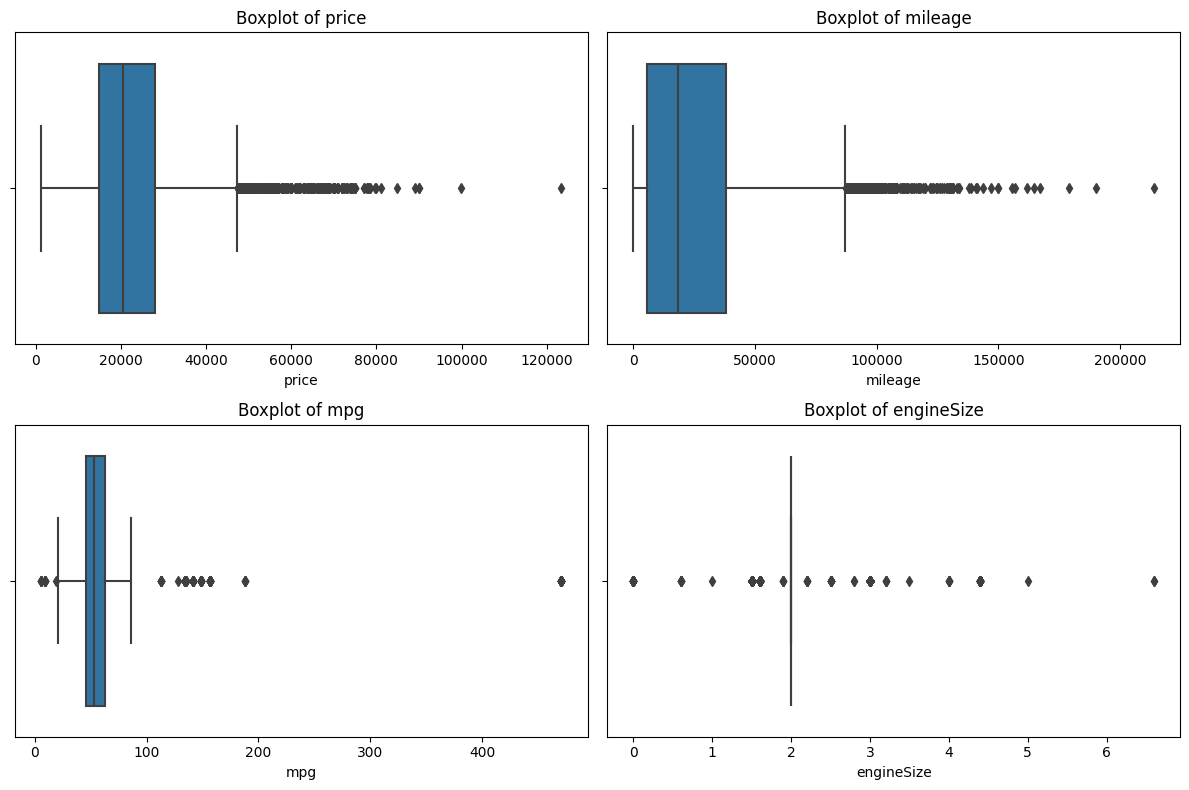

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset the DataFrame for the variables you want
variables_of_interest = ['price', 'mileage', 'mpg', 'engineSize']
subset_df = audi_df[variables_of_interest]

# Create a boxplot for each variable
plt.figure(figsize=(12, 8))

# Loop through each variable and create a boxplot
for i, var in enumerate(variables_of_interest, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=subset_df[var])
    plt.title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()


# Ignore past this point

-different countries have different classifications of car sizes, cannot accurately size
-need a 'master' list

-having weight classes would have been easier to classify the vehicles into categories e.g. light duty, medium duty, heavy duty. https://afdc.energy.gov/data/10380

-perhaps engine size could be the identifier

-cannot really explore outliers because of how dependent the data is on each other, e.g. price heavily depends on mileage, engineSize, tax, mpg, and year

In [125]:
import requests

def fetch_country_car_mapping_from_api():
    # Wikipedia API endpoint for parsing content
    api_endpoint = "https://en.wikipedia.org/w/api.php"

    # Parameters for the API request to extract content
    params = {
        'action': 'parse',
        'format': 'json',
        'page': 'List_of_current_automobile_manufacturers_by_country',
        'section': 1  # Section number where the content is present
    }

    try:
        # Send a request to the Wikipedia API
        response = requests.get(api_endpoint, params=params)
        response_data = response.json()

        # Check if the response is valid
        if 'parse' not in response_data:
            print("Failed to retrieve data from Wikipedia.")
            return None

        # Extract the content from the parsed data
        content = response_data['parse']['text']['*']

        # Use BeautifulSoup to parse the content
        soup = BeautifulSoup(content, 'html.parser')

        # Process the data and extract country names and corresponding car manufacturers
        country_car_mapping = {}
        current_country = None

        for element in soup.find_all(['h3', 'ul']):
            if element.name == 'h3':
                current_country = element.text.strip()
                country_car_mapping[current_country] = []
            elif element.name == 'ul' and current_country:
                car_manufacturers = element.find_all('li')
                for manufacturer in car_manufacturers:
                    country_car_mapping[current_country].append(manufacturer.text.strip())

        return country_car_mapping

    except requests.exceptions.RequestException as e:
        print("Error: ", e)
        return None

# Fetch country-car mapping using the Wikipedia API
country_car_mapping_api = fetch_country_car_mapping_from_api()

# Print the obtained country-car mapping
for country, manufacturers in country_car_mapping_api.items():
    print(f"Country: {country}")
    print(f"Car Manufacturers: {manufacturers}\n")


Country: Algeria[edit]
Car Manufacturers: ['SNVI']

Country: Argentina[edit]
Car Manufacturers: ['Zanella', 'Koller']

Country: Australia[edit]
Car Manufacturers: ['ACE EV Group', 'Borland Racing', 'Bolwell', 'Brabham Automotive', 'Elfin Sports Cars', 'Ford Australia', 'GMSV']

Country: Austria[edit]
Car Manufacturers: ['Magna Steyr', 'Puch', 'Tushek & Spigel']

Country: Azerbaijan[edit]
Car Manufacturers: ['AzSamand', 'Ganja Auto Plant', 'Nakhchivan Automobile Plant']



In [126]:
country_car_mapping_api

{'Algeria[edit]': ['SNVI'],
 'Argentina[edit]': ['Zanella', 'Koller'],
 'Australia[edit]': ['ACE EV Group',
  'Borland Racing',
  'Bolwell',
  'Brabham Automotive',
  'Elfin Sports Cars',
  'Ford Australia',
  'GMSV'],
 'Austria[edit]': ['Magna Steyr', 'Puch', 'Tushek & Spigel'],
 'Azerbaijan[edit]': ['AzSamand',
  'Ganja Auto Plant',
  'Nakhchivan Automobile Plant']}

In [127]:
import requests
from bs4 import BeautifulSoup

def fetch_country_car_mapping_from_api():
    # Wikipedia API endpoint for parsing content
    api_endpoint = "https://en.wikipedia.org/w/api.php"

    # Dictionary to store country-car mapping
    country_car_mapping = {}

    # Iterate through sections A to Z
    for section_number in range(1, 27):  # 26 sections for each letter of the alphabet
        # Parameters for the API request to extract content for the specific section
        params = {
            'action': 'parse',
            'format': 'json',
            'page': 'List_of_current_automobile_manufacturers_by_country',
            'section': section_number
        }

        try:
            # Send a request to the Wikipedia API
            response = requests.get(api_endpoint, params=params)
            response_data = response.json()

            # Check if the response is valid
            if 'parse' not in response_data:
                print(f"Failed to retrieve data for section {chr(64 + section_number)}")
                continue

            # Extract the content from the parsed data
            content = response_data['parse']['text']['*']

            # Use BeautifulSoup to parse the content
            soup = BeautifulSoup(content, 'html.parser')

            # Process the data and extract country names and corresponding car manufacturers
            current_country = None
            for element in soup.find_all(['h3', 'ul']):
                if element.name == 'h3':
                    current_country = element.text.strip()
                    country_car_mapping.setdefault(current_country, [])
                elif element.name == 'ul' and current_country:
                    car_manufacturers = element.find_all('li')
                    for manufacturer in car_manufacturers:
                        country_car_mapping[current_country].append(manufacturer.text.strip())

        except requests.exceptions.RequestException as e:
            print(f"Error for section {chr(64 + section_number)}: {e}")

    return country_car_mapping

# Fetch country-car mapping using the Wikipedia API
country_car_mapping_api = fetch_country_car_mapping_from_api()

# Print the obtained country-car mapping
for country, manufacturers in country_car_mapping_api.items():
    print(f"Country: {country}")
    print(f"Car Manufacturers: {manufacturers}\n")


Country: Algeria[edit]
Car Manufacturers: ['SNVI', 'SNVI']

Country: Argentina[edit]
Car Manufacturers: ['Zanella', 'Koller', 'Zanella', 'Koller']

Country: Australia[edit]
Car Manufacturers: ['ACE EV Group', 'Borland Racing', 'Bolwell', 'Brabham Automotive', 'Elfin Sports Cars', 'Ford Australia', 'GMSV', 'ACE EV Group', 'Borland Racing', 'Bolwell', 'Brabham Automotive', 'Elfin Sports Cars', 'Ford Australia', 'GMSV']

Country: Austria[edit]
Car Manufacturers: ['Magna Steyr', 'Puch', 'Tushek & Spigel', 'Magna Steyr', 'Puch', 'Tushek & Spigel']

Country: Azerbaijan[edit]
Car Manufacturers: ['AzSamand', 'Ganja Auto Plant', 'Nakhchivan Automobile Plant', 'AzSamand', 'Ganja Auto Plant', 'Nakhchivan Automobile Plant']

Country: Bangladesh[edit]
Car Manufacturers: ['Aftab Automobiles', 'PHP Automobiles', 'Aftab Automobiles', 'PHP Automobiles']

Country: Belarus[edit]
Car Manufacturers: ['BelAZ', 'BelGee', 'MAZ', 'MoAZ', 'MZKT', 'Neman', 'BelAZ', 'BelGee', 'MAZ', 'MoAZ', 'MZKT', 'Neman']

Coun

In [2]:
import requests
from bs4 import BeautifulSoup
import time

def fetch_country_car_mapping_from_api():
    # Wikipedia API endpoint for parsing content
    api_endpoint = "https://en.wikipedia.org/w/api.php"

    # Dictionary to store country-car mapping
    country_car_mapping = {}

    # Iterate through sections A to Z
    for section_number in range(1, 27):  # 26 sections for each letter of the alphabet
        # Parameters for the API request to extract content for the specific section
        params = {
            'action': 'parse',
            'format': 'json',
            'page': 'List_of_current_automobile_manufacturers_by_country',
            'section': section_number
        }

        try:
            # Send a request to the Wikipedia API
            response = requests.get(api_endpoint, params=params)
            response_data = response.json()

            # Check if the response is valid
            if 'parse' not in response_data:
                print(f"Failed to retrieve data for section {chr(64 + section_number)}")
                continue

            # Extract the content from the parsed data
            content = response_data['parse']['text']['*']

            # Use BeautifulSoup to parse the content
            soup = BeautifulSoup(content, 'html.parser')

            # Process the data and extract country names and corresponding car manufacturers
            current_country = None
            for element in soup.find_all(['h3', 'ul']):
                if element.name == 'h3':
                    current_country = element.text.strip()
                    country_car_mapping.setdefault(current_country, [])
                elif element.name == 'ul' and current_country:
                    car_manufacturers = element.find_all('li')
                    for manufacturer in car_manufacturers:
                        country_car_mapping[current_country].append(manufacturer.text.strip())

            # Introduce a delay to stay within API rate limits
            time.sleep(1)

        except requests.exceptions.RequestException as e:
            print(f"Error for section {chr(64 + section_number)}: {e}")

    return country_car_mapping

# Fetch country-car mapping using the Wikipedia API
country_car_mapping_api = fetch_country_car_mapping_from_api()

# Print the obtained country-car mapping
for country, manufacturers in country_car_mapping_api.items():
    print(f"Country: {country}")
    print(f"Car Manufacturers: {manufacturers}\n")


Country: Algeria[edit]
Car Manufacturers: ['SNVI', 'SNVI']

Country: Argentina[edit]
Car Manufacturers: ['Zanella', 'Koller', 'Zanella', 'Koller']

Country: Australia[edit]
Car Manufacturers: ['ACE EV Group', 'Borland Racing', 'Bolwell', 'Brabham Automotive', 'Elfin Sports Cars', 'Ford Australia', 'GMSV', 'ACE EV Group', 'Borland Racing', 'Bolwell', 'Brabham Automotive', 'Elfin Sports Cars', 'Ford Australia', 'GMSV']

Country: Austria[edit]
Car Manufacturers: ['Magna Steyr', 'Puch', 'Tushek & Spigel', 'Magna Steyr', 'Puch', 'Tushek & Spigel']

Country: Azerbaijan[edit]
Car Manufacturers: ['AzSamand', 'Ganja Auto Plant', 'Nakhchivan Automobile Plant', 'AzSamand', 'Ganja Auto Plant', 'Nakhchivan Automobile Plant']

Country: Bangladesh[edit]
Car Manufacturers: ['Aftab Automobiles', 'PHP Automobiles', 'Aftab Automobiles', 'PHP Automobiles']

Country: Belarus[edit]
Car Manufacturers: ['BelAZ', 'BelGee', 'MAZ', 'MoAZ', 'MZKT', 'Neman', 'BelAZ', 'BelGee', 'MAZ', 'MoAZ', 'MZKT', 'Neman']

Coun